# Outline the business domain

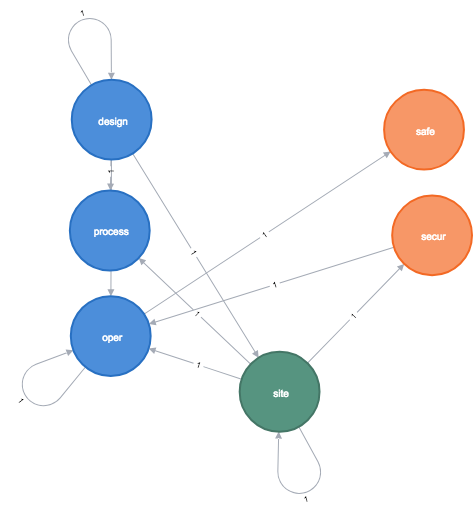

|**[Overview](#Overview)** |**[Prior-steps](#Prior-steps)**|**[How-to-use](#How-to-use)**|**[Next-steps](#Next-steps)**|**[Postscript](#Postscript)**|**[Acknowledgements](#Acknowledgments)|

# Overview
 Step 7 has built a knowledge-graph-from-keywords. Now we use the knowledge graph to understand the business domain covered by the document library we are looking at. In consultation with the portfolio stakeholders, and domain experts, we can modify the knowledge-graph to reflect a sensible way of handling the business domain. 
 
The immediate output is either:

 - a knowledge graph, which can handle multiple views or facets reflecting different stakeholder understanding
 
 or
 
- tree data structure, cut down from the knowledge graph, that reflects one convergent, dominating knowledge structure suitable for organising portfolio services in this business domain. 

# Installation

Check installation has been made, as per the [READme](https://github.com/lawrencerowland/Data-Model-for-Project-Frameworks/blob/master/Project-frameworks-by-using-NLP-with-Python-libraries/README.md)

At this point you will need Neo4j (or you can do this in YEd or Gephi). 

# Prior-steps
Steps 5-7 minimum

# How-to-use

## Open Neo4j

In [ ]:
#hide
#Use either Neo4j Desktop, or create a Neo4j sandbox. 
#Change security settings for APOC. Where you do this is different between v 3.5 and 4
apoc.import.file.enabled=true
apoc.export.file.enabled=true
#See https://neo4j.com/docs/labs/apoc/current/import/graphml

## Import knowledge-graph

In [ ]:
CALL apoc.import.graphml("https://raw.githubusercontent.com/lawrencerowland/Data-Model-for-Project-Frameworks/master/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/Keyword-graph.graphml",{storeNodeIds: true})

Give all keywords a label. 

In [ ]:
MATCH (n)
SET n:keyword
RETURN n.name, labels(n) AS labels

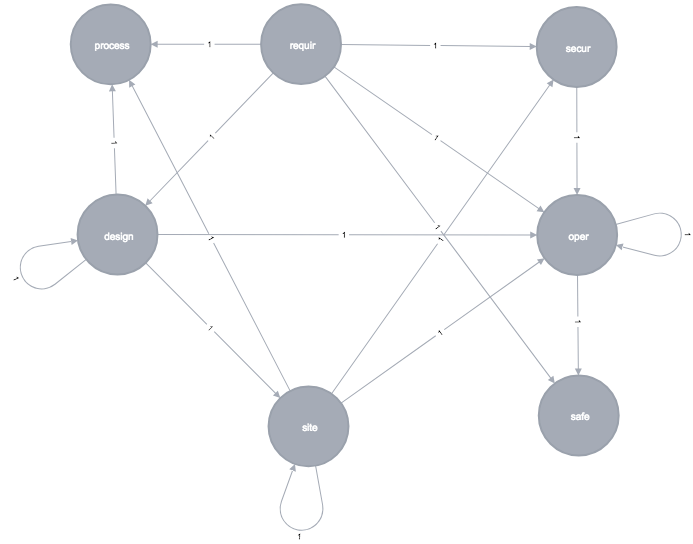

## Adjust graph with domain experts

I look at the diagram and drag nodes around until I see a set of useful relationships to review with stakeholders.

- Example
- I see an Operating model comprising: Design <-> Process ,<->Operations
- I see a site which runs the Operating model. 
- I see a set of 'requirements which are confirmed to be appropriate'   Safety, Security

There will be many ways of seeing things. That is feature, not a bug!

- Example
- Because I could also see how Operations/Operability sit in requirements. 

The good thing about knowledge graphs is that one can retain whichever relationships are helpful in the mind's eye of one or other of the stakeholders. 

- Example
- But it is also sometimes needful to simplify, and so I go with Operations as being in business model. 
- The nodes, 'requirements' and 'appropriate' have been useful in seeing this, but now I dont need them as separate nodes. 
- So I first delete 'requirements' and 'appropriate'

In [ ]:
MATCH (m) WHERE m.id='requir' OR m.id='appropri' DETACH DELETE (m)

## Create new labels that reflect your preferred clusters or groups

- Example
- I label the categories of requirement as Requirement
- So also for Site and Operating model

I can now handle nodes by their appropriate label, colouring and arranging them accordingly.
One can also invert relationships.

MATCH (f:Foo)-[rel:FOOBAR {a:1}]->(b:Bar)
CALL apoc.refactor.invert(rel)
yield input, output
RETURN input, output

In [ ]:
MATCH (m) WHERE m.id='safe' OR m.id='secur' SET m:requirement RETURN (m)
MATCH (m) WHERE m.id='oper'OR m.id='site'OR m.id='process' OR m.id='design' SET m:keyword:Opmodel RETURN (m)
MATCH (m) WHERE m.id='site ' SET m:site RETURN (m)
MATCH (m:keyword) REMOVE m:keyword RETURN (m)

The schema of the graph looks like this (CALL db.schema())

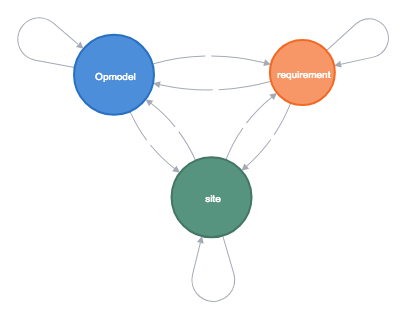

The full knowledge graph looks like this:

![final.png](attachment:1816fd18-9276-4df8-b800-c3ffab85a15a.png)

# Export graph
To view it in YEd, one can either:
- go via the YWorks NEo4j explorer app
-or open the graphml file in YEd, and use the properties mapper to map across the label. 
-or go to gephi (for this, there is an extra parameter in the export API) 

#hide
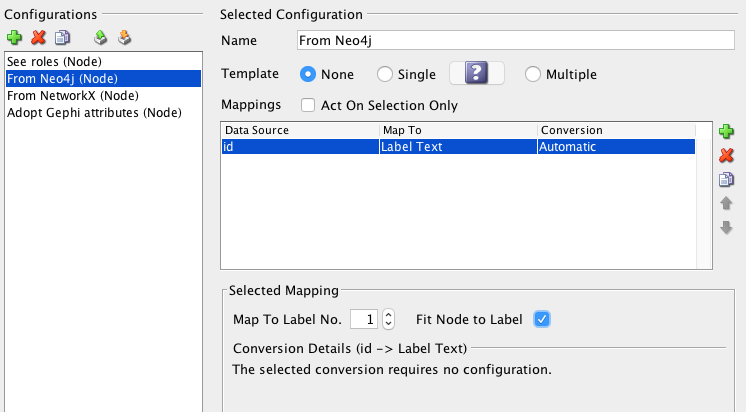

In [ ]:
CALL apoc.export.graphml.all("Keyword-graph-1.graphml.graphml", {})

In [ ]:
#hide
#This will be saved in the Import folder within Neo4j Graph settings
# It needs to be manually moved to the 'Interim-results folder'

In [ ]:

2. Reverse directions
3. Remove self-links

Step 9 Alternate views

4. Create as Tree Business Model - Requirements - Site
5. Explain that would be natural for some strategic portfolio design contexts
6. Say another context would be the reverse, understanding the context from the perspective of Site Operator
7. Say could even be Reqts- model- Site, where in a new type of environment, and requirments were fixed but not business model
8. Build these other two models as graphs

Step 10 Combine with other views (e.g. scope, schedule)

Future enhancement is a step 11, to show an example of deploying those particular modules